In [52]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Part A - Linear Regression
* Using the same research question from previous project:

**Do FriedPotato Consumption, Depression and Smoking History affect Alcohol Consumption?**

In [53]:
# Reading the csv file and transforming the data using the code from EX1:
original_df = pd.read_csv('CVD_cleaned.csv')

# Transforming df
original_df = original_df[['FriedPotato_Consumption', 'Depression', 'Smoking_History', 'Alcohol_Consumption']]
original_df['Depression'] = original_df['Depression'].replace({'Yes': 1, 'No': 0})
original_df['Smoking_History'] = original_df['Smoking_History'].replace({'Yes': 1, 'No': 0})
original_df.head()

,FriedPotato_Consumption,Depression,Smoking_History,Alcohol_Consumption
0,12.0,0,1,0.0
1,4.0,0,0,0.0
2,16.0,0,0,4.0
3,8.0,0,0,0.0
4,0.0,0,1,0.0


In [54]:
# sample 200 rows:
df_sample = original_df.sample(n=200, random_state=42)

# Q 1 + 2

## Q 1.1

In [55]:
y = df_sample['Alcohol_Consumption'].to_numpy()
x = df_sample[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
x.insert(0, 'x0', 1)
x = x.to_numpy()

xTx = x.T @ x
xTx_inv = np.linalg.inv(xTx)
xTy = x.T @ y

b_sam = xTx_inv @ xTy

print(f"y = {b_sam[0]} + {b_sam[1]} * x1 + {b_sam[2]} * x2 + {b_sam[3]} * x3")

y = 4.408915277098989 + -1.311272987454263 * x1 + 1.2845022838125948 * x2 + -0.03862935845846112 * x3


In [56]:
def all_data_beta():
    # Calculating b0, b1, b2, b3 for all data
    df = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')
    df = df[['FriedPotato_Consumption', 'Depression', 'Smoking_History', 'Alcohol_Consumption']]
    df['Depression'] = df['Depression'].replace({'Yes': 1, 'No': 0})
    df['Smoking_History'] = df['Smoking_History'].replace({'Yes': 1, 'No': 0})
    y = df['Alcohol_Consumption'].to_numpy()
    x = df[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
    x.insert(0, 'x0', 1)
    x = x.to_numpy()
    xTx = x.T @ x
    xTx_inv = np.linalg.inv(xTx)
    xTy = x.T @ y
    b = xTx_inv @ xTy
    return b

In [57]:
# CI of b0, b1, b2 and b3 based on normal approximation
n = 200
p = x.shape[1]
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha / 2)
P = np.dot(x.dot(xTx_inv), x.T)
e = (np.eye(n) - P).dot(y)
sigma_squared = (1 / (n - p)) * np.sum(e**2)
cov = xTx_inv
b_all = all_data_beta()
ci_list = []
for i in range(4):
    se_estimated = np.sqrt(sigma_squared * cov[i][i])
    CI_beta_i = [b_sam[i] - z_alpha * se_estimated,b_sam[i] + z_alpha * se_estimated]
    print(f"CI for beta {i} is: {CI_beta_i}")
    print(f"Legnth of CI is: {CI_beta_i[1] - CI_beta_i[0]}")
    print(f"Is CI of beta {i} in sample data contains the estimator of original data: "
          f"{b_all[i] <= CI_beta_i[1] and b_all[i] >= CI_beta_i[0]}\n")
  
    

CI for beta 0 is: [2.943083740058616, 5.874746814139361]
Legnth of CI is: 2.9316630740807454
Is CI of beta 0 in sample data contains the estimator of original data: True

CI for beta 1 is: [-3.9943570320234962, 1.3718110571149702]
Legnth of CI is: 5.366168089138466
Is CI of beta 1 in sample data contains the estimator of original data: True

CI for beta 2 is: [-0.806599737693894, 3.375604305319084]
Legnth of CI is: 4.182204043012978
Is CI of beta 2 in sample data contains the estimator of original data: True

CI for beta 3 is: [-0.11517437817120994, 0.037915661254287705]
Legnth of CI is: 0.15309003942549765
Is CI of beta 3 in sample data contains the estimator of original data: True



## Q 1.2

In [58]:
def calc_beta(x, y):
    xTx = x.T @ x
    xTx_inv = np.linalg.inv(xTx)
    xTy = x.T @ y
    b = xTx_inv @ xTy
    return b


In [59]:
# CI using bootstarp
B = 400
beta_0, beta_1, beta_2, beta_3 = [], [], [], []
for i in range(B):
    # Randomly sample 200 indices
    sample_indices = np.random.choice(len(x), size=200, replace=True)

    # Using the sampled indices to extract the corresponding samples from x and y
    sample_x = x[sample_indices]
    sample_y = y[sample_indices]
    
    # Calculating beta based on sampled x and y
    b = calc_beta(sample_x, sample_y)
    
    # Storing results
    beta_0.append(b[0])
    beta_1.append(b[1])    
    beta_2.append(b[2])    
    beta_3.append(b[3])    

# Calclutaing se
beta_se = [np.std(beta_0), np.std(beta_1), np.std(beta_2), np.std(beta_3)]

for i in range(4):
    se_estimated = beta_se[i]
    CI_beta_i = [b_sam[i] - z_alpha * se_estimated,b_sam[i] + z_alpha * se_estimated]
    print(f"CI for beta {i} is: {CI_beta_i}")
    print(f"Legnth of CI is: {CI_beta_i[1] - CI_beta_i[0]}")
    print(f"Is CI of beta {i} in sample data contains the estimator of original data: "
          f"{b_all[i] <= CI_beta_i[1] and b_all[i] >= CI_beta_i[0]}\n")

CI for beta 0 is: [3.018309784250924, 5.799520769947053]
Legnth of CI is: 2.781210985696129
Is CI of beta 0 in sample data contains the estimator of original data: True

CI for beta 1 is: [-3.7236582334678987, 1.1011122585593727]
Legnth of CI is: 4.824770492027271
Is CI of beta 1 in sample data contains the estimator of original data: True

CI for beta 2 is: [-0.8396838081545217, 3.408688375779711]
Legnth of CI is: 4.248372183934233
Is CI of beta 2 in sample data contains the estimator of original data: True

CI for beta 3 is: [-0.08696069948613619, 0.009701982569213959]
Legnth of CI is: 0.09666268205535014
Is CI of beta 3 in sample data contains the estimator of original data: False



## Q 1.3

In [60]:
# Calcualting quatiles for b0, b1, b2 and b3:
betas = [beta_0, beta_1, beta_2, beta_3]
quantiles = []
for b in betas:
    quantiles.append(np.quantile(b, [0.025, 0.975]))
print(quantiles[0][1])
for i in range(4):
    CI_beta_i = [(2 * b_sam[i]) - quantiles[i][1], (2 * b_sam[i]) - quantiles[i][0]]
    print(f"CI for beta {i} is: {CI_beta_i}")
    print(f"Legnth of CI is: {CI_beta_i[1] - CI_beta_i[0]}")
    print(f"Is CI of beta {i} in sample data contains the estimator of original data: "
          f"{b_all[i] <= CI_beta_i[1] and b_all[i] >= CI_beta_i[0]}\n")

5.869389899684543
CI for beta 0 is: [2.9484406545134343, 5.771414650360337]
Legnth of CI is: 2.822973995846903
Is CI of beta 0 in sample data contains the estimator of original data: True

CI for beta 1 is: [-3.701280833853289, 0.984327707322544]
Legnth of CI is: 4.685608541175833
Is CI of beta 1 in sample data contains the estimator of original data: True

CI for beta 2 is: [-0.7392843580336006, 3.207255699079223]
Legnth of CI is: 3.9465400571128235
Is CI of beta 2 in sample data contains the estimator of original data: True

CI for beta 3 is: [-0.09096086211063034, 0.01563006849520912]
Legnth of CI is: 0.10659093060583946
Is CI of beta 3 in sample data contains the estimator of original data: False



## Q 1.4

In [63]:
# Quantiles CI
for i, q in enumerate(quantiles):
    print(f"CI of beta{i}: {quantiles[i]}") 
    print(f"Legnth of CI is: {quantiles[i][1] - quantiles[i][0]}")
    print(f"Is CI of beta {i} in sample data contains the estimator of original data: "
          f"{b_all[i] <= quantiles[i][1] and b_all[i] >= quantiles[i][0]}\n")

CI of beta0: [3.0464159 5.8693899]
Legnth of CI is: 2.822973995846903
Is CI of beta 0 in sample data contains the estimator of original data: True

CI of beta1: [-3.60687368  1.07873486]
Legnth of CI is: 4.685608541175833
Is CI of beta 1 in sample data contains the estimator of original data: True

CI of beta2: [-0.63825113  3.30828893]
Legnth of CI is: 3.9465400571128235
Is CI of beta 2 in sample data contains the estimator of original data: True

CI of beta3: [-0.09288879  0.01370215]
Legnth of CI is: 0.10659093060583946
Is CI of beta 3 in sample data contains the estimator of original data: False



__Observing the majority of the confidence intervals we calculated, it's evident that they encompass the parameter based on the entire dataset, except for beta 3 in some intervals. Furthermore, we note that the confidence interval length for methods 3 and 4 aligns with our theoretical expectations.__

## Q 3

### Q 3.1

In [64]:
# Get the indices of the previously sampled 200 samples
sampled_indices = df_sample.index

# Drop the previously sampled indices from the original dataframe
remaining_df = original_df.drop(sampled_indices)

# Sample 100 samples from the remaining dataframe
new_sample_df = remaining_df.sample(n=100, random_state=42)

In [65]:
x_new = new_sample_df[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
x_new.insert(0, 'x0', 1)
x_new = x_new.to_numpy()

# Calculating predicted y-values for each sample in x_new
y_pred = x_new.dot(b_sam)
y_new = new_sample_df['Alcohol_Consumption'].to_numpy()


### Q 3.2

In [66]:
y_pred_list = []

for i in range(B):
    df_bootstrap = df_sample.sample(n=200, random_state=i, replace=True)
    x = df_bootstrap[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
    x.insert(0, 'x0', 1)
    y = df_bootstrap['Alcohol_Consumption'].to_numpy()
    b = calc_beta(x, y)
    y_pred = np.array(x).dot(b)
    y_pred_list.append(y_pred)
    

In [67]:
y_pred_list = np.array(y_pred_list)
count = 0
for i in range(len(y)):
    y_pred_i_se = np.std(np.array(y_pred_list[:, i]))
    print('CI for y_pred: [' + str(y_pred[i] - 1.96*y_pred_i_se) + ', ' + str(y_pred[i] + 1.96*y_pred_i_se) + ']')

    if (y_pred[i] - z_alpha * y_pred_i_se) <= y[i] and  (y_pred[i] + z_alpha * y_pred_i_se) >= y[i]:
        count += 1

CI for y_pred: [4.036208364662358, 8.743422829555655]
CI for y_pred: [3.909295536104665, 9.055971085026371]
CI for y_pred: [3.9355654054830405, 8.65843036182195]
CI for y_pred: [1.1831433378161669, 6.139911475550473]
CI for y_pred: [-0.8820724324049254, 4.294327057324171]
CI for y_pred: [1.1238869450985183, 6.445496072280944]
CI for y_pred: [3.664773363188194, 8.929222404116796]
CI for y_pred: [3.6955710575424874, 9.084060136675527]
CI for y_pred: [1.4100077064737913, 6.377135674175404]
CI for y_pred: [1.163613616697993, 5.973805769755625]
CI for y_pred: [1.3492479890262188, 6.345077678166467]
CI for y_pred: [1.4054932432126463, 6.660103277806083]
CI for y_pred: [0.7629770215821914, 6.188806937958404]
CI for y_pred: [1.4313899188198635, 6.541388888742356]
CI for y_pred: [3.9016515823603988, 8.970797325314125]
CI for y_pred: [-0.7305013967735068, 4.328391448605775]
CI for y_pred: [-1.0663580957352707, 3.9217064399154493]
CI for y_pred: [4.112191545059629, 8.853075076071407]
CI for y_pre

### Q 3.3

In [68]:
print('The proportion of y_pred falling within the confidence interval: ' + str(count) + '%')

The proportion of y_pred falling within the confidence interval: 64%


__We obtained a confidence interval of 64% instead of 95% because we computed the confidence interval for the expected value of y_new given x_new, rather than for y_new given x_new.__

### Q 3.4

__To compute the confidence interval for Ynew instead of the expectation, we will replicate the previous calculations but also account for the noise. This entails utilizing bootstrapping to estimate the variance of the noise.__

# Part B - Tests

## Research question is:
###### Does alcohol consumption vary between men and women?
* X - Alcohol_Consumption
* Y - Sex (2 categories: 1 - male, 0 - female)

## Q 1

__Is the distribution of alcohol consumption higher in the male category compared to the female category?__

## Q 2

In [69]:
# Reading the csv file and transforming the data using the code from EX1:
df = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')

# Choosing relevant columns:
df = df[['Alcohol_Consumption','Sex']]

# Changing categorical variables into binary values
df['Sex'] = df['Sex'].replace(['Male', 'Female'], [1, 0])
df.head()

,Alcohol_Consumption,Sex
0,0.0,0
1,0.0,0
2,4.0,0
3,0.0,1
4,0.0,1


In [70]:
# sample 200 rows:
df_sample_2 = df.sample(n=200, random_state=65643)
df_sample_2

,Alcohol_Consumption,Sex
131734,0.0,1
133706,1.0,1
278302,1.0,1
178106,0.0,1
279619,5.0,1
...,...,...
63233,12.0,1
233311,7.0,0
232302,1.0,0
221501,0.0,0


## Q 3

**We will denote µ1 as the mean alcohol consumption for males and µ2 as the mean alcohol consumption for females.**

𝛿 = µ1 - µ2

### Q 3.1

In [71]:
# Calculate mean consumption for sex=1 (male)
x_male = df_sample_2[df_sample_2['Sex'] == 1]['Alcohol_Consumption'].mean()

# Calculate mean consumption for sex=0 (female)
y_female = df_sample_2[df_sample_2['Sex'] == 0]['Alcohol_Consumption'].mean()

print("Mean alcohol consumption for males:", x_male)
print("Mean alcohol consumption for females:", y_female)


Mean alcohol consumption for males: 6.6767676767676765
Mean alcohol consumption for females: 3.267326732673267


In [72]:
𝛿 = x_male - y_female
print("Estimator of 𝛿:", 𝛿)

Estimator of 𝛿: 3.4094409440944093


__The estimators are Maximum Likelihood Estimators because we derived them from the mean of alcohol consumption among males and females, We observed in Project 1 that they exhibit an approximate normal distribution.__

__Additionally, 𝛿 follows a normal distribution since it's a linear combination of normally distributed variables.__

### Q 3.2

In [73]:
# CI for delta based on normal approximation
# Var(𝛿) = Var(X_mean) + Var(Y_mean)
var_x_mean = df_sample_2[df_sample_2['Sex'] == 1]['Alcohol_Consumption'].var() / n
var_y_mean = df_sample_2[df_sample_2['Sex'] == 0]['Alcohol_Consumption'].var() / n
var_delta = var_x_mean + var_y_mean
se_delta = np.sqrt(var_delta)

ci_len = z_alpha * se_delta
CI = [𝛿 - ci_len , 𝛿 + ci_len]
print(f"Confidence Interval of 𝛿: {CI}")

Confidence Interval of 𝛿: [1.8062165230364113, 5.012665365152407]


### Q 3.3

In [74]:
# This function estimates delta based on entire data
def estimate_delta():
    df = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')
    df = df[['Alcohol_Consumption','Sex']]
    df['Sex'] = df['Sex'].replace(['Male', 'Female'], [1, 0])
    
    # Calculate mean consumption for sex=1 (male)
    x_male = df[df['Sex'] == 1]['Alcohol_Consumption'].mean()

    # Calculate mean consumption for sex=0 (female)
    y_female = df[df['Sex'] == 0]['Alcohol_Consumption'].mean()
    
    return x_male - y_female
    

In [75]:
delta_all = estimate_delta()
print(f"Is the estimator of 𝛿 based on the entire dataset within the confidence interval: "
      f"{delta_all >= CI[0] and delta_all <= CI[1]}")

Is the estimator of 𝛿 based on the entire dataset within the confidence interval: True


### Q 3.4

### Wald Test:
* H0: 𝛿 = 0
* H1 : 𝛿 > 0
* T.S: delta_estimator / se_delta
* R.R : |W| > z(1-alpha)

__Permutation Test:__

𝐻0: 𝐹_𝑋 = 𝐹_𝑌

𝐻1: 𝐹_𝑋 ≺ 𝐹_𝑌

T.S: Y_mean - X_mean
 
RR: p_value < alpha

- (Y - male, X - female)

In [76]:
# Wald test:
z = stats.norm.ppf(0.95)
wald_statistic = 𝛿 / se_delta
p_value = stats.norm.sf(abs(wald_statistic))

print(f"p value is: {p_value}")
print(f"Reject H0: {abs(wald_statistic) > z}")

p value is: 1.5358226247671562e-05
Reject H0: True


**We obtained a low p-value, indicating that the observed test statistic is highly unlikely to occur under the null hypothesis. Therefore, we have strong evidence to reject the null hypothesis in favor of the alternative hypothesis.**

In [77]:
# Calculating number of male
num_male = df_sample_2[df_sample_2['Sex'] == 1].shape[0]
print("Number of male:", num_male)

Number of male: 99


In [78]:
# Permutations test:
# Since we assume continuous values, we can ignore ties.
T0 = 𝛿
count = 0
k = 10000
for i in range(k):
    sampled_df = df_sample_2.sample(n=200, replace=True)
    
    # Calculate mean consumption for sex=1 (male)
    male_mean = sampled_df[sampled_df['Sex'] == 1]['Alcohol_Consumption'].mean()

    # Calculate mean consumption for sex=0 (female)
    female_mean = sampled_df[sampled_df['Sex'] == 0]['Alcohol_Consumption'].mean()
    T_cur = male_mean - female_mean
    if T_cur >= T0:
        count += 1
p_value = count / k
print(f"p-value is: {p_value }\n")
print(f"Reject H0: {p_value < 0.05}")


p-value is: 0.504

Reject H0: False


**We got that we can't reject H0 and also p value is relatively high.**

**The disparities in the outcomes of the Wald test and permutation test can be attributed to their distinct objectives: while the Wald test assesses the equality of means, the permutation test evaluates the equality of distributions.**

## Q 4

### Q 4.1

In [79]:
m1 = df_sample_2[df_sample_2['Sex'] == 1]['Alcohol_Consumption'].median()
m2 = df_sample_2[df_sample_2['Sex'] == 0]['Alcohol_Consumption'].median()
delta_estimator = m1 - m2

print('Median 1: ' + str(m1))
print('Median 2: ' + str(m2))
print('Delta estimator: ' + str(delta_estimator))

Median 1: 1.0
Median 2: 0.0
Delta estimator: 1.0



**Given our assumption of normal distribution in the data, we can infer that our estimator aligns with Maximum Likelihood Estimation (MLE) principles. This is because the normal distribution exhibits symmetry around its mean, making the median and the mean equal.**

### Q 4.2

Since we observed symmetric normal distribution, where the mean and median coincide, the variances of the mean and median are equal.

In [80]:
CI_2 = [delta_estimator - ci_len , delta_estimator + ci_len]

print(f"Confidence Interval of 𝛿: {CI_2}")

Confidence Interval of 𝛿: [-0.603224421057998, 2.6032244210579982]


### Q 4.3

In [81]:
# This function estimates delta based on entire data
def estimate_delta_median():
    df = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')
    df = df[['Alcohol_Consumption','Sex']]
    df['Sex'] = df['Sex'].replace(['Male', 'Female'], [1, 0])
    
    # Calculate median consumption for sex=1 (male)
    m1 = df[df['Sex'] == 1]['Alcohol_Consumption'].median()

    # Calculate median consumption for sex=0 (female)
    m2 = df[df['Sex'] == 0]['Alcohol_Consumption'].median()
    delta_estimator = m1 - m2
    
    return m1 - m2 
    

In [82]:
delta_all_2 = estimate_delta_median()
print(f"Is the estimator of 𝛿 based on the entire dataset within the confidence interval: "
      f"{delta_all_2 >= CI_2[0] and delta_all_2 <= CI_2[1]}")

Is the estimator of 𝛿 based on the entire dataset within the confidence interval: True


### Q 4.4

__Permutation Test:__

𝐻0: 𝐹_𝑋 = 𝐹_𝑌

𝐻1: 𝐹_𝑋 ≺ 𝐹_𝑌

T.S: Y_median - X_median
 
RR: p_value < alpha

- (Y - male, X - female)

In [83]:
# Permutation test:
# Since we assume continuous values, we can ignore ties.
T0 = delta_estimator
count = 0
k = 10000
for i in range(k):
    sampled_df = df_sample_2.sample(n=200, replace=True)
    
    # Calculate median consumption for sex=1 (male)
    m1_sam = sampled_df[sampled_df['Sex'] == 1]['Alcohol_Consumption'].median()

    # Calculate median consumption for sex=0 (female)
    m2_sam = sampled_df[sampled_df['Sex'] == 0]['Alcohol_Consumption'].median()
    T_cur = m1_sam - m2_sam
    if T_cur >= T0:
        count += 1

p_value = count / k
print(f"p-value is: {p_value }\n")
print(f"Reject H0: {p_value < 0.05}")


p-value is: 0.6859

Reject H0: False


### Q 4.5

In [84]:
# F test: H0: var(male) = var(female), H1: var(male) ≠ var(female)
var_male = df_sample_2[df_sample_2['Sex'] == 1]['Alcohol_Consumption'].var()
var_female = df_sample_2[df_sample_2['Sex'] == 0]['Alcohol_Consumption'].var()

# Calculate the F-test statistic
F_statistic = var_male / var_female

# Degrees of freedom for male and female variances
df1 = len(df_sample_2[df_sample_2['Sex'] == 1]) - 1
df2 = len(df_sample_2[df_sample_2['Sex'] == 0]) - 1

# Calculate the p-value
p_value = stats.f.cdf(F_statistic, df1, df2)

print("F-test statistic:", F_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H0: var(male) != var(female)")
else:
    print("Fail to reject H0: var(male) = var(female)")

F-test statistic: 2.474247338176305
P-value: 0.9999952706183035
Fail to reject H0: var(male) = var(female)


**We can use Wald test since delta is MLE as explained earlier.**

**We can also use t test since all conditions are met:**

1) n > 30 (in our case n = 200)
2) Equal variances by F test.
3) Data is normally distributed.

## Q 5

__Permutation Test:__

𝐻0: 𝐹_𝑋 = 𝐹_𝑌

𝐻1: 𝐹_𝑋 ≺ 𝐹_𝑌

T.S: ∑Si, sum of male ranks
 
RR: p_value < alpha

- (Y - male, X - female)

In [85]:
sorted_df =  df_sample_2.sort_values(by='Alcohol_Consumption')
sorted_df['Position'] = range(1, len(sorted_df) + 1)
T0 = sorted_df[sorted_df['Sex'] == 1]['Position'].sum()
count = 0
for i in range(k):
    sampled_df = df_sample_2.sample(n=200, replace=True)
    
    # Sort the DataFrame by 'Alcohol_Consumption' in ascending order
    df_sorted = sampled_df.sort_values(by='Alcohol_Consumption')

    # Add another column representing the position
    df_sorted['Position'] = range(1, len(df_sorted) + 1)

    # Sum the "Position" column for rows where "Sex" equals 1
    s1 = df_sorted[df_sorted['Sex'] == 1]['Position'].sum()
    
    if s1 >= T0:
        count += 1
    
p_value = count / k
print(f"p-value is: {p_value }\n")
print(f"Reject H0: {p_value < 0.05}")    


p-value is: 0.6188

Reject H0: False


In [86]:
# Using normal approx.
n = df_sample_2[df_sample_2['Sex'] == 1].shape[0]
m = df_sample_2[df_sample_2['Sex'] == 0].shape[0]
N = n + m
E_ws = (n*(N + 1)) / 2
var_ws = n * m * (N + 1) / 12
print(f"Reject H0: {((T0 - E_ws) / np.sqrt(var_ws)) > stats.norm.ppf(0.95)}")

Reject H0: False


__As we can see we can't reject H0 under both tests.__

## Q6

__The majority of our tests indicate that both male and female alcohol consumption stem from the same distribution. Additionally, as evident from their histograms, it is reasonable to infer that they originate from approximately identical distributions, as we can see below.__

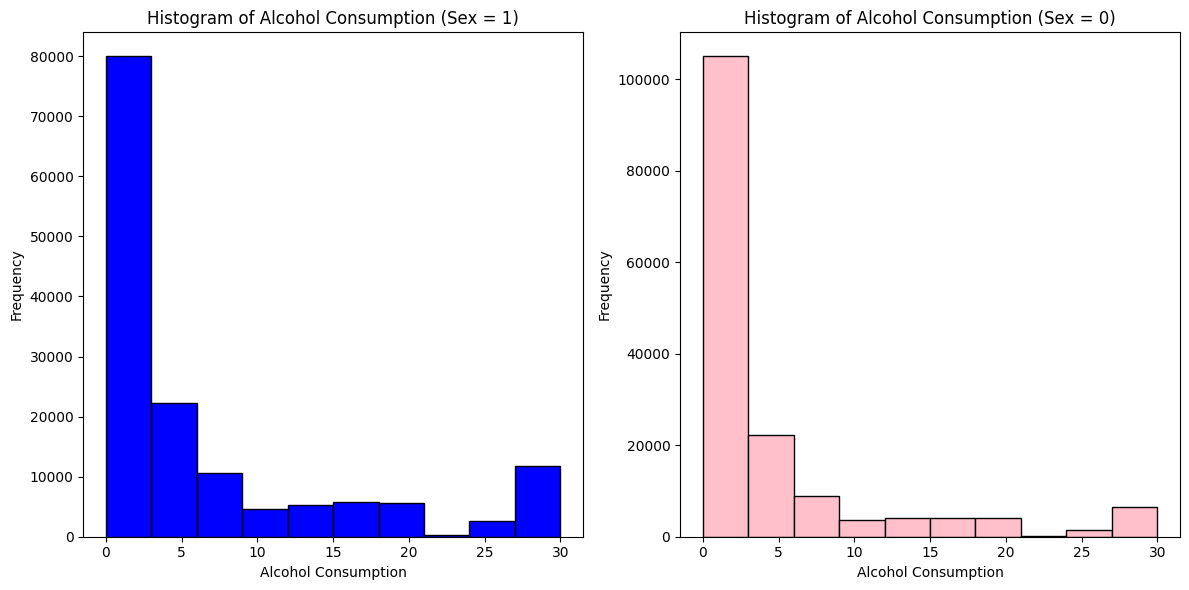

In [87]:
# Reading the csv file and transforming the data using the code from EX1:
original_df = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')

# Transforming df
original_df = original_df[['Sex', 'Alcohol_Consumption']]
original_df['Sex'] = original_df['Sex'].replace({'Male': 1, 'Female': 0})

# Filter the DataFrame for rows where 'Sex' equals 1 and 0
df_sex_1 = original_df[original_df['Sex'] == 1]
df_sex_0 = original_df[original_df['Sex'] == 0]

# Plot histograms side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_sex_1['Alcohol_Consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Consumption (Sex = 1)')

plt.subplot(1, 2, 2)
plt.hist(df_sex_0['Alcohol_Consumption'], bins=10, color='pink', edgecolor='black')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Consumption (Sex = 0)')

plt.tight_layout()
plt.show()